# Projeto final

Bem vindo ao projeto final do curso/módulo de Pandas.
Neste projeto, você deve responder a um conjunto de perguntas feitas a dois conjuntos de dados:

1. [Obesity among adults by country, 1975-2016](https://www.kaggle.com/amanarora/obesity-among-adults-by-country-19752016/)
2. [GDP Per Person (1901-2011)](https://www.kaggle.com/divyansh22/gdp-per-person-19012011?select=GDP.csv)

Tais conjuntos de dados são públicos foram publicados no Kaggle. Mais instruções sobre cada um deles podem ser encontrados nos links acima. Você também os encontrará na pasta `Datasets`, dentro de nossas apostilas.

In [36]:
import pandas as pd
import numpy as np

## Perguntas - Obesity among adults by country, 1975-2016

In [85]:
df = pd.read_csv("datasets/obesity_cleaned.csv")

- Limpe os dados do DataFrame, criando uma coluna de nome 'Obesity' que conterá os valores de obesidade. Transforme em float as colunas que porventura foram importadas como string.

In [93]:

def text_to_number(text):
    if text == "No data":
        return np.nan
    return float(text.split()[0])
    

# del df["Unnamed: 0"]
df["Obesity"] = df["Obesity (%)"].apply(text_to_number)
df["Obesity (%)"].value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24570 entries, 0 to 24569
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    24570 non-null  int64  
 1   Country       24570 non-null  object 
 2   Year          24570 non-null  int64  
 3   Obesity (%)   24570 non-null  object 
 4   Sex           24570 non-null  object 
 5   country-year  24570 non-null  object 
 6   Obesity       24066 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 1.3+ MB


In [39]:
# df.set_index("Year", inplace=True)
# # df.info()

# df

In [40]:
# del df["Obesity (%)"]
df


,Unnamed: 0,Country,Year,Obesity (%),Sex,Obesity
0,0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes,0.5
1,1,Afghanistan,1975,0.2 [0.0-0.6],Male,0.2
2,2,Afghanistan,1975,0.8 [0.2-2.0],Female,0.8
3,3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes,0.5
4,4,Afghanistan,1976,0.2 [0.0-0.7],Male,0.2
...,...,...,...,...,...,...
24565,24565,Zimbabwe,2015,4.5 [2.4-7.6],Male,4.5
24566,24566,Zimbabwe,2015,24.8 [18.9-31.3],Female,24.8
24567,24567,Zimbabwe,2016,15.5 [12.0-19.2],Both sexes,15.5
24568,24568,Zimbabwe,2016,4.7 [2.5-8.0],Male,4.7


- Qual o percentual médio de obesidade por sexo no mundo no ano de 2015?

In [86]:

# df.info()
# filtro = df.index == 2015
# filtro
# df[filtro].groupby("Sex").mean()
# df.info()
# df["Obesity"].dropna()
# pd.DataFrame(df[df.index == 2015].groupby("Sex")["Obesity"].mean())

# dfobesity = df 


- Quais são os 5 países com a maior e a menor taxa de aumento nos índices de obesidade no período observado?

In [42]:
df_obesity_start = df[df.index == 1975]
df_obesity_end = df[df.index == 2016]

df_obesity_start.set_index("Country", inplace=True)
df_obesity_end.set_index("Country", inplace=True)

df_obesity_ev = df_obesity_end[df_obesity_end["Sex"] == "Both sexes"]["Obesity"] - df_obesity_start[df_obesity_start["Sex"] == "Both sexes"]["Obesity"]

df_obesity_ev.sort_values().dropna()

Series([], Name: Obesity, dtype: float64)

In [43]:
df_obesity_end[df_obesity_end.index == "Tuvalu"]

,Unnamed: 0,Year,Obesity (%),Sex,Obesity
Country,,,,,


- Quais os países com maiores e menores níveis percetuais de obesidade em 2015?

In [44]:
# df[df["Obesity"] == 63.1]
df[df["Obesity"] == df[df.index == 2015]["Obesity"].max()]

,Unnamed: 0,Country,Year,Obesity (%),Sex,Obesity
863,863,Argentina,2010,26.3 [21.3-31.8],Female,26.3
867,867,Argentina,2012,26.3 [22.2-30.7],Both sexes,26.3
1550,1550,Bahrain,1987,26.3 [19.8-33.0],Female,26.3
2015,2015,Belarus,2016,26.3 [18.9-34.2],Female,26.3
5390,5390,Cuba,2007,26.3 [21.0-32.1],Female,26.3
9691,9691,Hungary,2013,26.3 [20.2-32.9],Male,26.3
12060,12060,Lebanon,2005,26.3 [22.4-30.5],Both sexes,26.3
12575,12575,Lithuania,2008,26.3 [21.0-31.5],Female,26.3
12597,12597,Lithuania,2016,26.3 [21.4-31.4],Both sexes,26.3
13513,13513,Marshall Islands,1985,26.3 [18.2-35.0],Male,26.3


- Qual a diferença média percentual de obesidade entre sexos ao longo dos anos para o Brasil?

<Axes: >

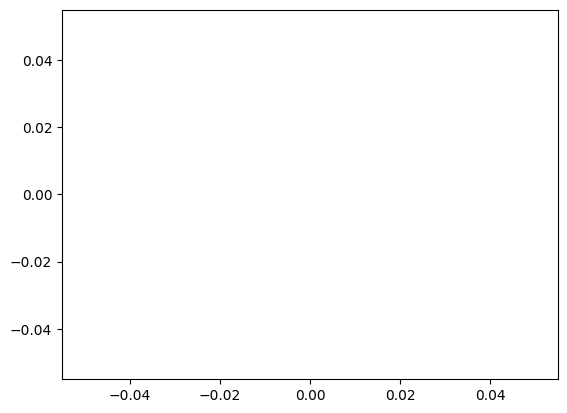

In [45]:
dfbrasil = df[df['Country'] == "Brazil"]

(dfbrasil[dfbrasil["Sex"] == "Female"]["Obesity"] - dfbrasil[dfbrasil["Sex"] == "Male"]["Obesity"]).plot()

- Você conseguiria plotar um gráfico mostrando a evolução da obesidade para ambos sexos no mundo?

<Axes: xlabel='Year'>

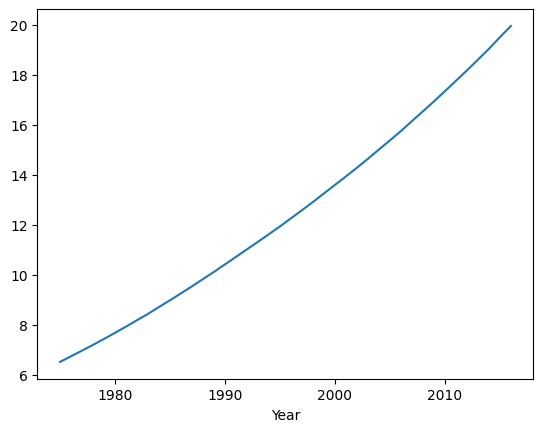

In [46]:
dfsexboth = df[df["Sex"] == "Both sexes"]

dfsexboth.groupby("Year")["Obesity"].mean().plot()

## Perguntas - GDP Per Person (1901-2011)

In [47]:
dfgdp = pd.read_csv("datasets/gdp.csv", decimal=".")



- Limpe o conjunto de dados, convertendo strings em datas ou float, quando necessário.

In [54]:


# dfgdp["Year"] = pd.to_datetime(dfgdp["Year"])
dfgdp["Year"] = dfgdp["Year"].apply(lambda x: int(x.split("/")[-1]))
dfgdp["gdp"] = dfgdp[" GDP_pp "].apply(lambda x: float(x.replace(",","")))
# dfgdp["gpd"] = dfgdp[" GDP_pp "].apply(lambda x: float(x.split()[0]))
# dfgdp.info()
# del dfgdp["gpd"]
# del dfgdp[" GDP_pp "]
dfgdp

,Country,Region,Year,GDP_pp,gdp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40,662.40
...,...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1991,782.09,782.09
4415,Zimbabwe,Sub-Saharan Africa,1996,781.50,781.50
4416,Zimbabwe,Sub-Saharan Africa,2001,719.96,719.96
4417,Zimbabwe,Sub-Saharan Africa,2006,520.17,520.17


- Você conseguiria informar o primeiro valor registrado de cada país?

In [49]:
# dfgdp.groupby("Country")["gdp"].first()
dfgdp.groupby("Country")["Year"].min()

Country
Afghanistan    1/1/1901
Albania        1/1/1901
Algeria        1/1/1901
Andorra        1/1/1901
Angola         1/1/1901
                 ...   
Venezuela      1/1/1901
Vietnam        1/1/1901
Yemen, Rep.    1/1/1901
Zambia         1/1/1901
Zimbabwe       1/1/1901
Name: Year, Length: 193, dtype: object

In [50]:
dfgdp.groupby("Country")["Year"].min().value_counts()

Year
1/1/1901    192
1/1/1991      1
Name: count, dtype: int64

In [51]:
dfgdp.groupby("Country")["Year"].min()[dfgdp.groupby("Country")["Year"].min() == 1991]
# dfgdp[dfgdp["Year"] == 1991]

Series([], Name: Year, dtype: object)

- Informe as regiões com maiores crescimentos de PIB per capita no século passado.

In [55]:
dfgdp[dfgdp["Year"] < 2000]

dfgdpstart = dfgdp[dfgdp["Year"] == 1901]
dfgdpend = dfgdp[dfgdp["Year"] == 1996]

# dfgdpstart
dfgdpend

((dfgdpend.groupby("Region")["gdp"].mean() / dfgdpstart.groupby("Region")["gdp"].mean() -1) * 100).sort_values()

Region
Sub-Saharan Africa                               248.633780
South America                                    312.123735
Australia and Oceania                            396.075383
Central America and the Caribbean                406.426789
North America                                    589.760175
Europe                                           594.046167
Asia                                             711.761516
Middle East, North Africa, and Greater Arabia    857.215950
Name: gdp, dtype: float64

In [57]:
dfgdpstart.groupby("Region")["gdp"].mean()

Region
Asia                                              900.756296
Australia and Oceania                            1492.222000
Central America and the Caribbean                1460.596842
Europe                                           2583.788478
Middle East, North Africa, and Greater Arabia    1164.350000
North America                                    3676.015000
South America                                    1638.665833
Sub-Saharan Africa                                650.119783
Name: gdp, dtype: float64

- Preecha os anos ausentes em cada país com uma estimativa, baseada na diferença entre o próximo registro e o anterior.

In [58]:
arr_year = np.arange(dfgdp["Year"].min(), dfgdp["Year"].max())

dfallyears = pd.DataFrame(arr_year, columns=["Year"])
dfallyears.index = dfallyears["Year"]

dfyearsoff = ~dfallyears["Year"].isin(dfgdp["Year"])
# arr_year
dfallyears
dfyearsoff = dfallyears.loc[dfyearsoff].index

dfyearsoff

Index([1902, 1903, 1904, 1905, 1907, 1908, 1909, 1910, 1912, 1913, 1914, 1915,
       1917, 1918, 1919, 1920, 1922, 1923, 1924, 1925, 1927, 1928, 1929, 1930,
       1932, 1933, 1934, 1935, 1937, 1938, 1939, 1940, 1942, 1943, 1944, 1945,
       1947, 1948, 1949, 1950, 1952, 1953, 1954, 1955, 1957, 1958, 1959, 1960,
       1962, 1963, 1964, 1965, 1967, 1968, 1969, 1970, 1972, 1973, 1974, 1975,
       1977, 1978, 1979, 1980, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990,
       1992, 1993, 1994, 1995, 1997, 1998, 1999, 2000, 2002, 2003, 2004, 2005,
       2007, 2008, 2009, 2010],
      dtype='int64', name='Year')

In [59]:
dfgdp = dfgdp.sort_values(["Country", "Year"])

dfgdp["delta_gdp"] = dfgdp["gdp"] -  dfgdp["gdp"].shift(1)
dfgdp["delta_year"] = dfgdp["Year"] - dfgdp["Year"].shift(1)
dfgdp["gdp_year"] = (dfgdp["delta_gdp"] / dfgdp["delta_year"]).shift(-1)

dfgdp["next_year"] = dfgdp["Year"].shift(-1)

del dfgdp["delta_gdp"], dfgdp["delta_year"]

In [60]:
dfnewdata = pd.DataFrame()

for idx, row in dfgdp.iterrows():
    if row["Year"] == 2011:
        continue 
    years_to_add = dfyearsoff[(dfyearsoff < row["next_year"]) & (dfyearsoff > row['Year'])]
    
    for new_year in years_to_add:
        add_row = row.copy()
        add_row["gdp"] = (new_year - add_row["Year"]) * add_row["gdp_year"] + add_row["gdp"]
        add_row["Year"] = new_year 
        add_row["Kind"] = "estimated"
        dfnewdata = pd.concat([dfnewdata, add_row.to_frame().transpose()])
        

In [61]:
dfgdp = pd.concat([dfgdp, dfnewdata])
dfgdp

,Country,Region,Year,GDP_pp,gdp,gdp_year,next_year,Kind
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,613.99,2.01,1906.0,NaN
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04,624.04,2.042,1911.0,NaN
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25,634.25,2.606,1916.0,NaN
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28,647.28,3.024,1921.0,NaN
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40,662.4,3.094,1926.0,NaN
...,...,...,...,...,...,...,...,...
4416,Zimbabwe,Sub-Saharan Africa,2005,719.96,560.128,-39.958,2006.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2007,520.17,521.402,1.232,2011.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2008,520.17,522.634,1.232,2011.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2009,520.17,523.866,1.232,2011.0,estimated


In [62]:
dfgdp.sort_values(["Country", "Year"], inplace=True)

In [63]:
dfgdp["Kind"].fillna("real", inplace=True)

/tmp/ipykernel_333729/31793649.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfgdp["Kind"].fillna("real", inplace=True)


<Axes: xlabel='Year', ylabel='gdp'>

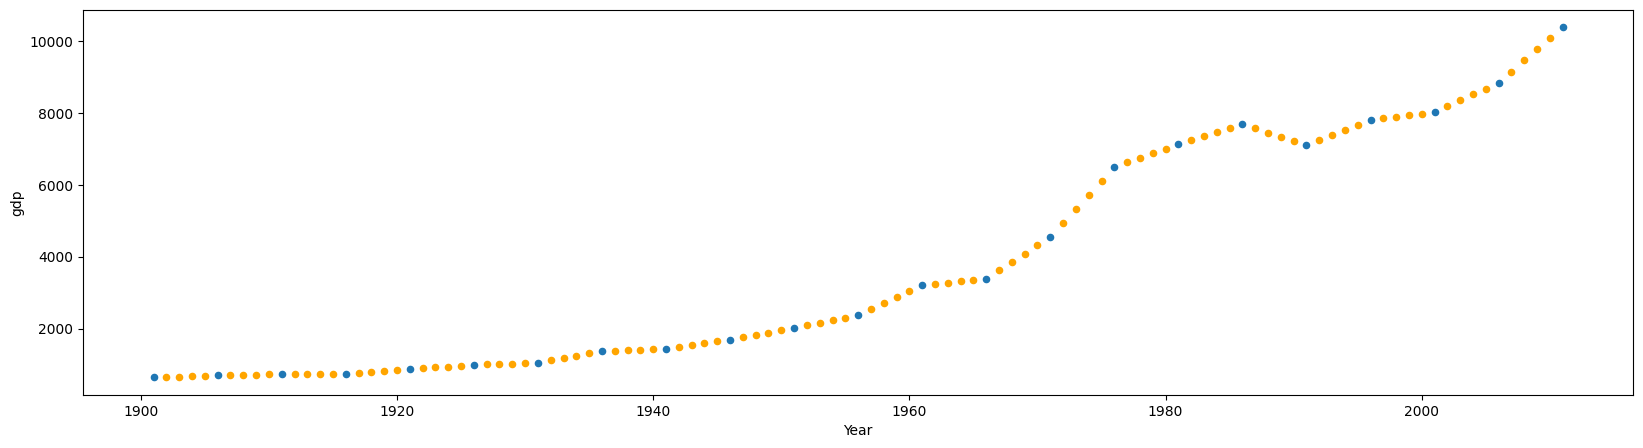

In [64]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize=(20,5))

country = "Brazil"

dfgdp[(dfgdp["Kind"] == "real") & (dfgdp["Country"] == country)].plot(kind="scatter", y="gdp", x="Year", ax=ax)
dfgdp[(dfgdp["Kind"] == "estimated") & (dfgdp["Country"] == country)].plot(kind="scatter", y="gdp", x="Year", ax=ax, color="orange")

### DESAFIOS
- Você conseguiria criar um mapa do gdp ou da obesidade no mundo ao longo dos anos?

In [65]:
dfgdp["Year"] = dfgdp["Year"].astype(int)
dfgdp["gdp"] = dfgdp["gdp"].astype(float)

In [66]:
import plotly.express as px

df = px.data.gapminder()

dict_iso_alpha = df.set_index("country").to_dict()["iso_alpha"]
dict_num = {j:i for i, j in enumerate(dfgdp["Country"].unique())}

dict_num = {j: i for i, j in enumerate(dfgdp["Country"].unique())}

dfgdp["iso_alpha"] = dfgdp["Country"].map(dict_iso_alpha)
dfgdp["iso_num"] = dfgdp["Country"].map(dict_num)
# dfgdp["Country"].unique()

# dfgdp
fig = px.choropleth(dfgdp[dfgdp["Kind"] == "real"].reset_index(drop=True), locations="iso_alpha", color="gdp", hover_name="Country", animation_frame="Year")
fig.update_layout(height=600)

fig.show()

- Há uma relação entre níveis de obesidade e gdp per capita?

In [100]:
dfobesity["country-year"] = dfobesity["Country"] + "-" + dfobesity.reset_index()["Year"].apply(lambda x: str(int(x))).values
dict_obesity_year = dfobesity.set_index("country-year").to_dict()["Obesity"]

# dfobesity
dfgdp["country-year"] = dfgdp["Country"] + "-" + dfgdp["Year"].apply(lambda x: str(int(x))).values

dfgdp["Obesity"] = dfgdp["country-year"].map(dict_obesity_year)

dfgdpclean = dfgdp.dropna()

dfgdpclean.reset_index(drop=True).groupby("Year")[["Obesity", "gdp"]].mean().corr()

,Obesity,gdp
Obesity,1.000000,0.969378
gdp,0.969378,1.000000
